# pyPanair Tutorial#1 Rectangular Wing  
---------------------------------------
In this tutorial we will perform an analysis of a rectangular wing with a NACA0012 airfoil.  
A brief overview of the procedure is listed below:  
1. Define the geometry of the wing using `wgs_creator.py`, and create input files `naca0012.wgs` and `naca0012.aux` for `panin`
2. Using the preprocessor `panin`, create an input file `a502.in` for `panair`
3. Run the analysis
4. Visualize the results from the analysis via `agps_converter.py`, `ffmf_converter.py`, and `calc_section_force.py`

## 1. Defining the geometry
---------------------------------------
### 1.1 LaWGS Format
First off, we will begin by defining the geometry of the rectangular wing.

The input geometry for `panair` (or more precisely, its preprocessor `panin`) is defined in the Langley Wireframe Geometry Standard (LaWGS) format. The format is described in [reference 1](https://ntrs.nasa.gov/search.jsp?R=19850014069).  

In a nutshell, LaWGS files are a bundle of 3 dimensional arrays, which are referred to as "networks". A network is composed of "lines", which in turn is composed of 3-dimensional "points". If a network has `m` lines, and each line of has `n` points, the shape of the corresponding 3d array will be `(m, n, 3)`. Below is an example of a LaWGS file for a delta wing.

```sample1.wgs
deltawing created from wgs_creator
wing
1 3 5 0   0 0 0   0 0 0    1 1 1  0
1.0000000e+01 0.0000000e+00 0.0000000e+00
5.0000000e+00 0.0000000e+00 1.0000000e+00
0.0000000e+00 0.0000000e+00 0.0000000e+00
5.0000000e+00 0.0000000e+00 -1.0000000e+00
1.0000000e+01 0.0000000e+00 0.0000000e+00
7.5000000e+00 1.0000000e+01 0.0000000e+00
5.0000000e+00 1.0000000e+01 5.0000000e-01
2.5000000e+00 1.0000000e+01 0.0000000e+00
5.0000000e+00 1.0000000e+01 -5.0000000e-01
7.5000000e+00 1.0000000e+01 0.0000000e+00
5.0000000e+00 2.0000000e+01 0.0000000e+00
5.0000000e+00 2.0000000e+01 0.0000000e+00
5.0000000e+00 2.0000000e+01 0.0000000e+00
5.0000000e+00 2.0000000e+01 0.0000000e+00
5.0000000e+00 2.0000000e+01 0.0000000e+00
```

The first row displays the title of the LaWGS file.
```
deltawing created from wgs_creator
```

The second row displays the name of the network.
```
wing
```

The third row lists the parameters of the network.
```
1 3 5 0   0 0 0   0 0 0    1 1 1  0
```
The definitions of the first three numbers are as follows:
* "1": the id of the network
* "3": the number of lines in the network
* "5": the number of points in each line

The remaining 11 numbers, `0   0 0 0   0 0 0    1 1 1  0`, define the local and global axes. (Read reference 1 for more information.)  

The fourth and subsequent lines, define the coordinates of each point. For example, the fourth line, `1.0000000e+01 0.0000000e+00 0.0000000e+00`, means that the coordinate of the first point is `x=1., y=0., z=0.`.

The wireframe defined by the above file looks like this ...

<IPython.core.display.Javascript object>


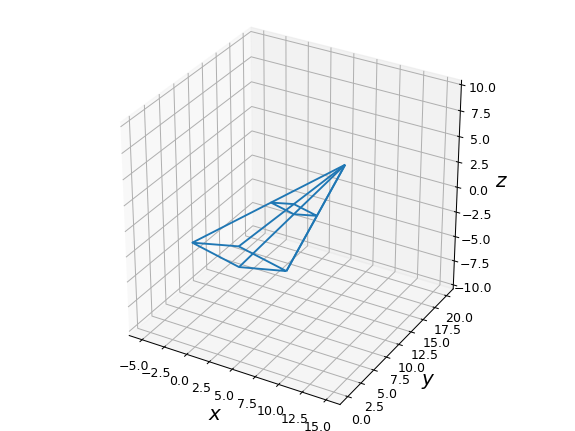

In [4]:
%matplotlib notebook
from pyPanair.preprocess import wgs_creator
delta_wing = wgs_creator.read_wgs("sample1.wgs")
delta_wing._networks[0].plot_wireframe(show_normvec=False, show_corners=False, show_edges=False)

### 1.2 Creating a LaWGS file using pyPanair
Next, we will create a LaWGS file using the `wgs_creator` module of `pyPanair`. In the `wgs_creator` module, LaWGS files are created using objects that derive from the four classes, `LaWGS`, `Network`, `Line`, and `Point`. A brief explanation of these classes are written below.  
* `LaWGS`: A class that represents a LaWGS format geometry as a list of `Networks`. Can be used to read/write LaWGS files.
* `Network`: A class that describes a network as a 3-dimensional array.
* `Line`: A class that represents a line as a 2-dimensional array.
* `Point`: A class that defines the xyz coordinates of a point. A 1-dimensional array is used to define the coordinates.

Now we will begin the actual work of creating a LaWGS file. First, we start of by initializing a `LaWGS` object. The title of the LaWGS object will be `"NACA0012"`.

In [5]:
wgs = wgs_creator.LaWGS("NACA0012")